In [1]:
# Import libraries
#pip install sodapy

import requests as res
import pandas as pd
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt

Health index is a quantifiable characteristic of a population for describing the health of a population depending on various factors. In the United states, Public Health index varies based on geographical area, lifestyle, occupation, preventive measures, access to health care etc. we are trying to predict the health index of a city based on statistical data we obtain from CDC  that provides data in categories like unhealthy behaviors like binge drinking, smoking, Sleeping less than 7 hrs. , less to no physical activity which leads to Health outcomes such as Arthritis, coronary heart disease, high blood pressure, mental health issues etc. 
Looking at this data for 500 cities in the united states we can come up with preventative measures such as public health awareness programs to targeted cities, access to better health care etc. 


### Step 1: Problem statement

PROBLEM: To identify emerging health problems in US amoung adults and to inform development and implementation of effective, targeted public health prevention activities.

SOLUTION: To provide quality health estimates for 500 cities in the US by providing data estimates for 27 measures of chronic disease related to unhealthy behaviors (5), health outcomes (13), and use of preventive services (9) and focus their efforts to improve Health.

DATASOURCE: Data sources used to generate these measures include:

-  Behavioral Risk Factor Surveillance System (BRFSS) data (2017, 2016),
-  Census Bureau 2010 census population data, and
-  American Community Survey (ACS) 2013-2017, 2012-2016 estimates

We are using structured dataset we have obtained from CDC website

PREDICTING:Emerging Health Problems in 500 cities in the US.

FEATURES:State, CityName, GeoLocation, Population Count,caterory,measure,Crude Prevalance

TARGET: datavalue

We are using a supervised model and trying to predict using regression model.

we are using multiple features such as the city/census tract, measures of cronic illness,population count to define the target.

### Step 2: Data Acquisition

DataSource : https://chronicdata.cdc.gov/500-Cities-Places/500-Cities-Local-Data-for-Better-Health-2019-relea/6vp6-wxuq

In [21]:
#https://dev.socrata.com/foundry/chronicdata.cdc.gov/6vp6-wxuq
#API to download data
# results = client.get("6vp6-wxuq", limit = 810200)
# chronicdata = pd.DataFrame.from_records(results)
# chronicdata.to_csv('500_Cities__Local_Data_for_Better_Health.csv')

In [4]:
# save it as a csv file
chronicdata = pd.DataFrame.from_records(results)
chronicdata.to_csv(r'C:\Users\achso\OneDrive\Documents\DS_II\500_Cities__Local_Data_for_Better_Health.csv',index = False)

In [2]:
#read chronic data
chronicdata_df = pd.read_csv(r'C:\Users\achso\OneDrive\Documents\DS_II\500_Cities__Local_Data_for_Better_Health.csv')                                            
chronicdata_df.head()

,year,stateabbr,statedesc,cityname,geographiclevel,datasource,category,uniqueid,measure,data_value_unit,...,geolocation,categoryid,measureid,cityfips,tractfips,short_question_text,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,data_value_footnote_symbol,data_value_footnote
0,2017,CA,California,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Arthritis among adults aged >=18 Years,%,...,"{'latitude': '33.905547923', 'longitude': '-11...",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09,Arthritis,8.0,1195.0,NaN,NaN
1,2017,CA,California,Hawthorne,City,BRFSS,Unhealthy Behaviors,0632548,Current smoking among adults aged >=18 Years,%,...,"{'latitude': '33.914667701', 'longitude': '-11...",UNHBEH,CSMOKING,632548.0,NaN,Current Smoking,8.0,1195.0,NaN,NaN
2,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,%,...,"{'latitude': '37.6329591551', 'longitude': '-1...",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease,8.0,1141.0,NaN,NaN
3,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,0633000,Obesity among adults aged >=18 Years,%,...,"{'latitude': '37.6329591551', 'longitude': '-1...",UNHBEH,OBESITY,633000.0,NaN,Obesity,8.0,1141.0,NaN,NaN
4,2017,CA,California,Hemet,City,BRFSS,Prevention,0633182,Cholesterol screening among adults aged >=18 Y...,%,...,"{'latitude': '33.7352277311', 'longitude': '-1...",PREVENT,CHOLSCREEN,633182.0,NaN,Cholesterol Screening,8.0,1177.0,NaN,NaN


### Step 3: Data Dictionary

| original column name       | column name           | description                       | datatype   |
|----------------------------|-----------------------|-----------------------------------|------------|
| Year                       | year                  | year                              | int        |
| StateAbbr                  | state                 | state abbrevation                 | string     |
| StateDesc                  | state_name            | state name                        | string     |
| CityName                   | city_name             | city name                         | string     |
| GeographicalLevel          | geographical_level    | US/City/Census Tract              | string     |
| DataSource                 | data_source           | data_source                       | string     |
| Category                   | category              | topic                             | string     |
| UniqueId                   | unique_id             | cityFIPS/tractFIPS                | string     |
| Measure                    | measure               | measure full name                 | string     |
| Data_Value_Unit            | unit                  | data value unit % for percent     | string     |
| DataValueTypeID            | data_type_id          | identifier for data value type    | string     |
| Data_Value_Type            | data_type             | data type                         | string     |
| Data_Value                 | data                  | data value                        | int        |
| Low_Confidence_Limit       | low_confidence_limit  | low confidence limit              | int        |
| High_Confidence_Limit      | high_confidence_limit | high confidence limit             | int        |
| Data_Value_Footnote_Symbol | footnote_symbol       | footnote symbol                   | string     |
| Data_Value_Footnote        | footnote_text         | footnote text                     | string     |
| PopulationCount            | population_count      | population count from census 2020 | int        |
| GeoLocation                | geolocation           | latitude and longitude            | dictionary |
| CategoryID                 | category              | identifier for topic              | string     |
| MeasureID                  | measure               | measure identifier                | string     |
| cityFIPS                   | city_fips             | FIPS code                         | string     |
| TractFIPS                  | tract_fips            | FIPS code                         | string     |
| Short_Question_Text        | measure_name          | measure short name                | string     |

In [28]:
#cleaning up the data
chronicdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         810103 non-null  int64  
 1   stateabbr                    810103 non-null  object 
 2   statedesc                    810103 non-null  object 
 3   cityname                     810047 non-null  object 
 4   geographiclevel              810103 non-null  object 
 5   datasource                   810103 non-null  object 
 6   category                     810103 non-null  object 
 7   uniqueid                     810103 non-null  object 
 8   measure                      810103 non-null  object 
 9   data_value_unit              810103 non-null  object 
 10  datavaluetypeid              810103 non-null  object 
 11  data_value_type              810103 non-null  object 
 12  data_value                   787311 non-null  float64
 13 

In [29]:
chronicdata_df[chronicdata_df['stateabbr'] == 'US'].index

Int64Index([   13,  2378,  2564,  3195,  3255,  3446,  3483,  3551,  3589,
             4165,  4244,  4521,  5446,  5683,  6344,  6351,  6498,  6559,
             7463,  7527,  8536,  8691,  8869,  9512,  9514,  9578,  9681,
             9889,  9907, 10228, 10283, 10324, 10521, 77847, 77913, 78947,
            79085, 79705, 79820, 80144, 80312, 80644, 80920, 81116, 81851,
            81897, 82010, 82145, 82202, 82872, 82926, 82956, 83058, 83244,
            84001, 84014],
           dtype='int64')

In [30]:
# Find all the Null Values - this is the overall data value for US and since we are predicting for 500 different cities we can drop these values
delete_rows =chronicdata_df[chronicdata_df['stateabbr'] == 'US'].index # city
chronicdata_df.drop(delete_rows, inplace= True)


In [31]:
chronicdata_df.isnull().sum()

year                                0
stateabbr                           0
statedesc                           0
cityname                            0
geographiclevel                     0
datasource                          0
category                            0
uniqueid                            0
measure                             0
data_value_unit                     0
datavaluetypeid                     0
data_value_type                     0
data_value                      22792
low_confidence_limit            22792
high_confidence_limit           22792
populationcount                     0
geolocation                         0
categoryid                          0
measureid                           0
cityfips                            0
tractfips                       28000
short_question_text                 0
:@computed_region_bxsw_vy29     17981
:@computed_region_he4y_prf8      3154
data_value_footnote_symbol     787255
data_value_footnote            787255
dtype: int64

# to find the health index in every city based on category

In [82]:
#create a dataset for only category
chronicdata_df.head()

,Unnamed: 0,year,stateabbr,statedesc,cityname,geographiclevel,datasource,category,uniqueid,measure,...,data_value,low_confidence_limit,high_confidence_limit,populationcount,geolocation,categoryid,measureid,cityfips,tractfips,short_question_text
0,0,2017,CA,California,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Arthritis among adults aged >=18 Years,...,14.6,13.9,15.2,4407,"{'latitude': '33.905547923', 'longitude': '-11...",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09,Arthritis
1,1,2017,CA,California,Hawthorne,City,BRFSS,Unhealthy Behaviors,0632548,Current smoking among adults aged >=18 Years,...,15.4,15.0,15.9,84293,"{'latitude': '33.914667701', 'longitude': '-11...",UNHBEH,CSMOKING,632548.0,NaN,Current Smoking
2,2,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,...,4.8,4.7,4.8,144186,"{'latitude': '37.6329591551', 'longitude': '-1...",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease
3,3,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,0633000,Obesity among adults aged >=18 Years,...,24.2,24.1,24.4,144186,"{'latitude': '37.6329591551', 'longitude': '-1...",UNHBEH,OBESITY,633000.0,NaN,Obesity
4,4,2017,CA,California,Hemet,City,BRFSS,Prevention,0633182,Cholesterol screening among adults aged >=18 Y...,...,78.0,77.6,78.3,78657,"{'latitude': '33.7352277311', 'longitude': '-1...",PREVENT,CHOLSCREEN,633182.0,NaN,Cholesterol Screening


# datatype table with values and analysis


| original column name       | column name           |  description                      |  datatype  | values                                                                                                                               | analysis                                                                                                |
|----------------------------|-----------------------|-----------------------------------|------------|--------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| Year                       | year                  | year                              | int        | 2016,2017                                                                                                                            |                                                                                                         |
| StateAbbr                  | state                 | state abbrevation                 | string     | TX,CA etc                                                                                                                            |                                                                                                         |
| StateDesc                  | state_name            | state name                        | string     | Texas,California                                                                                                                     |                                                                                                         |
| CityName                   | city_name             | city name                         | string     | Plano,frisco etc                                                                                                                     |                                                                                                         |
| GeographicalLevel          | geographical_level    | US/City/Census Tract              | string     | city,censustrack                                                                                                                     | city is summary level,censustract is detail within the city                                             |
| DataSource                 | data_source           | data_source                       | string     | BRFSS                                                                                                                                |                                                                                                         |
| Category                   | category              | topic                             | string     | Healthy outcomes, Preventions,unhealthy outcomes                                                                                     |                                                                                                         |
| UniqueId                   | unique_id             | cityFIPS/tractFIPS                | string     | some unique ID value for each row                                                                                                    |                                                                                                         |
| Measure                    | measure               | measure full name                 | string     | these are the measures for each of the categories in the category field                                                              |                                                                                                         |
| Data_Value_Unit            | unit                  | data value unit % for percent     | string     | %                                                                                                                                    |                                                                                                         |
| DataValueTypeID            | data_type_id          | identifier for data value type    | string     | CrdPrv,AgeAdjPrv                                                                                                                     | crude prevalence, age adjusted prevalance- we can consider either one of them to avoid redundant values |
| Data_Value_Type            | data_type             | data type                         | string     | Crude prevalence,Age-adjusted prevalence                                                                                             |                                                                                                         |
| Data_Value                 | data                  | data value                        | int        | average data value - target                                                                                                          |                                                                                                         |
| Low_Confidence_Limit       | low_confidence_limit  | low confidence limit              | int        | low confidence limit for data value                                                                                                  |                                                                                                         |
| High_Confidence_Limit      | high_confidence_limit | high confidence limit             | int        | high confidence limit for data value                                                                                                 |                                                                                                         |
| Data_Value_Footnote_Symbol | footnote_symbol       | footnote symbol                   | string     | Null                                                                                                                                 |                                                                                                         |
| Data_Value_Footnote        | footnote_text         | footnote text                     | string     | Null                                                                                                                                 |                                                                                                         |
| PopulationCount            | population_count      | population count from census 2020 | int        | 259841 for plano                                                                                                                     |                                                                                                         |
| GeoLocation                | geolocation           | latitude and longitude            | dictionary | {'latitude': '33.0502149278', 'longitude': '-96.7486409797', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}'} |                                                                                                         |
| CategoryID                 | category              | identifier for topic              | string     | HLTHOUT,PREVENT,UNHBEH                                                                                                               |                                                                                                         |
| MeasureID                  | measure               | measure identifier                | string     | abbrevation for the measures                                                                                                         |                                                                                                         |
| cityFIPS                   | city_fips             | FIPS code                         | string     | 4858016 for Plano                                                                                                                    | may be like unique code to identify a city                                                              |
| TractFIPS                  | tract_fips            | FIPS code                         | string     | multiple values based on census tract                                                                                                | maybe a unique code to identify a census tract                                                          |
| Short_Question_Text        | measure_name          | measure short name                | string     |                                                                                                                                      | short desc of the measure field                                                                         |


In [83]:
#chronicdata_df.info()

In [3]:
# created a subset ofthe data to analyse the health at city level. 
# few assumptions I have made for this analysis
# 1. Geographic level - I have considered only city
# 2. Data value type - I am considering only crdprv
# 3. category - I am considering analysis at the category level in my initial analysis. 
#    I am not taking each measure with in the category
chronicdata= {}
chronicdata= chronicdata_df[(chronicdata_df['geographiclevel']=="City" )]
#chronicdata

In [4]:
chronicdata = chronicdata[(chronicdata["datavaluetypeid"] == "CrdPrv")]
#chronicdata

In [5]:
# create a subset ofthe data 
chronicdata_sub = {}
chronicdata_sub = chronicdata[["year","stateabbr","statedesc","cityname","category","data_value","populationcount","cityfips"]]
chronicdata_sub = chronicdata_sub.reset_index(drop= True)
#chronicdata_sub.info()

In [6]:
#pd.unique(chronicdata_sub[['geographiclevel','category']].values.ravel())

## to check the null values in data_value column. 
chronicdata_sub[chronicdata_sub.data_value.isnull()]

,year,stateabbr,statedesc,cityname,category,data_value,populationcount,cityfips
360,2016,WA,Washington,Seattle,Prevention,NaN,608660,5363000.0
397,2016,AZ,Arizona,Chandler,Prevention,NaN,236123,412000.0
562,2016,AZ,Arizona,Mesa,Prevention,NaN,439041,446000.0
600,2016,AR,Arkansas,Springdale,Prevention,NaN,69797,566080.0
606,2016,AR,Arkansas,Jonesboro,Prevention,NaN,67263,535710.0
733,2016,AR,Arkansas,Little Rock,Prevention,NaN,193524,541000.0
761,2016,AR,Arkansas,Fort Smith,Prevention,NaN,86209,524550.0
824,2016,AZ,Arizona,Tucson,Prevention,NaN,520116,477000.0
864,2016,AZ,Arizona,Yuma,Prevention,NaN,93064,485540.0
895,2016,AZ,Arizona,Tempe,Prevention,NaN,161719,473000.0


In [7]:
#pd.unique(chronicdata_sub[['geographiclevel','category']].values.ravel())

## to check the null values in data_value column.these look like valid cities 
#  - from the data looks like one of the measure ( papsmear) does not have a data value through out
chronicdata_sub[chronicdata_sub.data_value.isnull()].head()
delete_papsm =chronicdata_sub[chronicdata_sub.data_value.isnull()].index
chronicdata_sub.drop(delete_papsm, inplace= True)

In [8]:
# convert category field to categorical variable
category_data = {}
category_data = pd.get_dummies(chronicdata_sub.category)
category_data

,Health Outcomes,Prevention,Unhealthy Behaviors
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
13995,1,0,0
13996,1,0,0
13997,0,0,1
13998,1,0,0


In [9]:
#append the dummy variable to the dataset
chronicdata_sub = pd.concat((chronicdata_sub,category_data),axis= 1)


In [10]:
# drop the category column
chronicdata_sub = chronicdata_sub.drop(["category"],axis = 1)

In [11]:
chronicdata_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13953 entries, 0 to 13999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 13953 non-null  int64  
 1   stateabbr            13953 non-null  object 
 2   statedesc            13953 non-null  object 
 3   cityname             13953 non-null  object 
 4   data_value           13953 non-null  float64
 5   populationcount      13953 non-null  int64  
 6   cityfips             13953 non-null  float64
 7   Health Outcomes      13953 non-null  uint8  
 8   Prevention           13953 non-null  uint8  
 9   Unhealthy Behaviors  13953 non-null  uint8  
dtypes: float64(2), int64(2), object(3), uint8(3)
memory usage: 912.9+ KB


In [12]:
#chronicdata_sub.head()


## Step 6:  Data preperation

- [X] Convert categorical features to dummy indices if you are doing regression or assign numerical labels if you are doing classification
- [ ] Do test train split to generate a test set. Further do a train validation split, you will need to run the test train split function from sklearn twice for this purpose


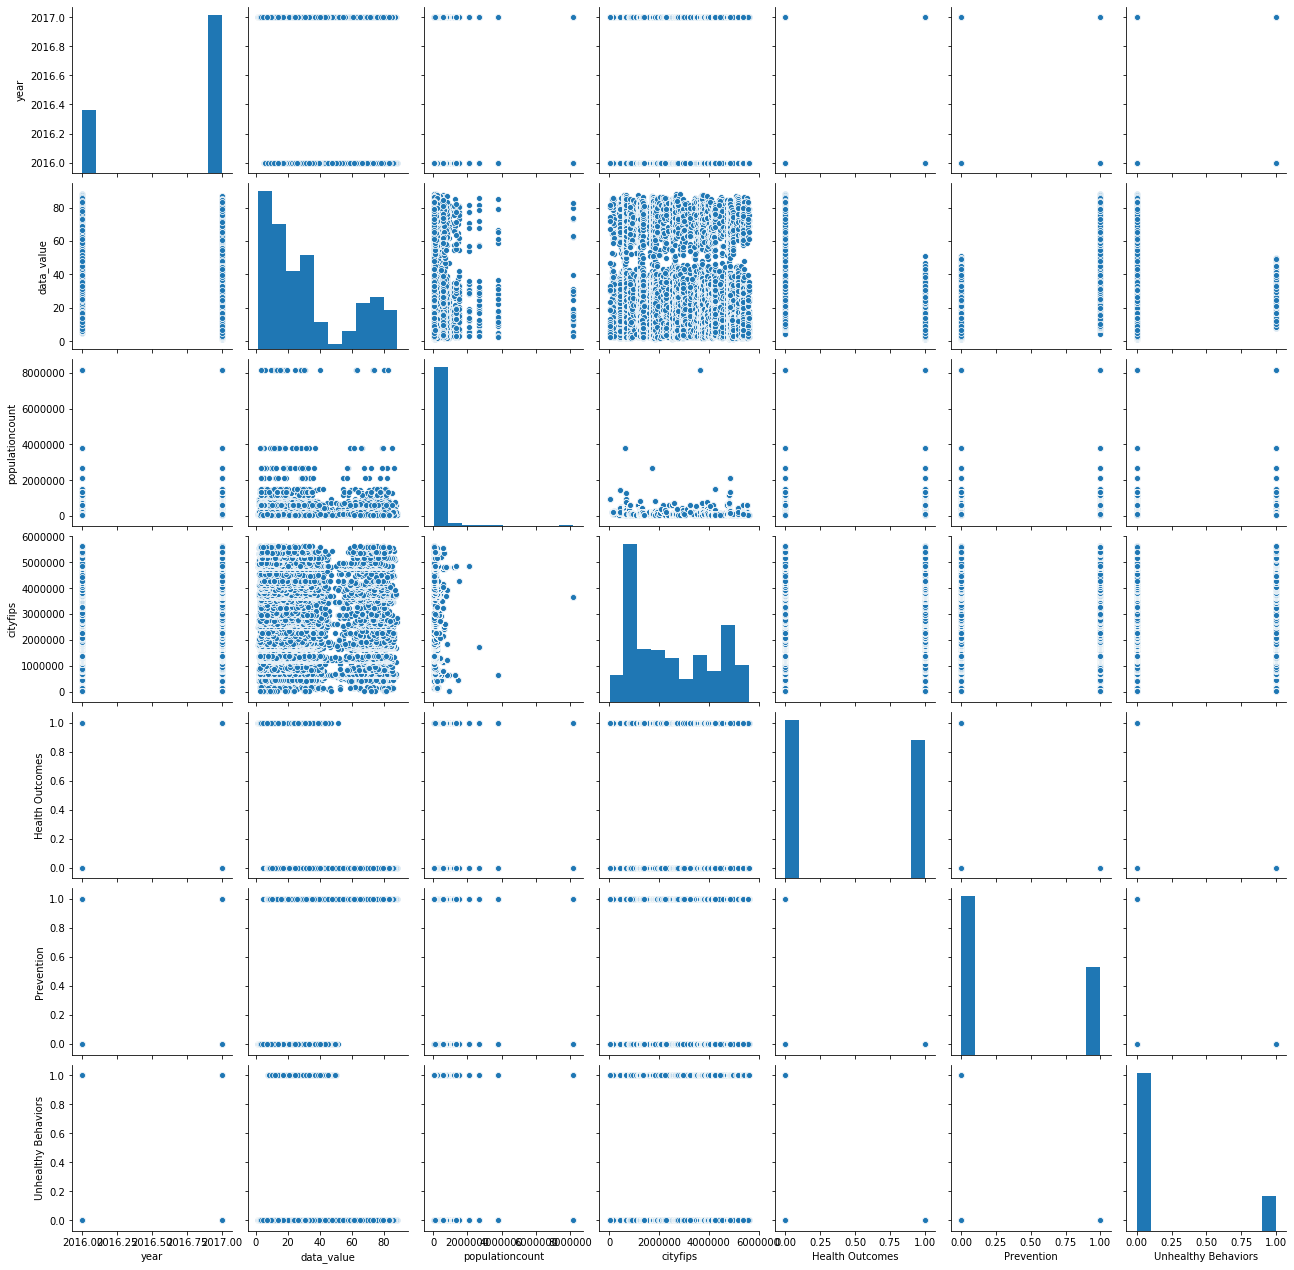

In [13]:
# First we will get the pair plot to see which variables are continuous
sns.pairplot(chronicdata_sub)
plt.show()